In [14]:
import os
import matplotlib.pyplot as plt
from funman_demo.parameter_space_plotter import ParameterSpacePlotter
from funman.server.query import FunmanResults
import pandas as pd
import json

RESULTS_DIR = os.path.join(
    os.path.dirname(os.path.abspath("")), "scratch/out/evaluation"
)

out_dir = os.path.join(os.path.dirname(os.path.abspath("")), "out")

if not os.path.exists(out_dir):
    os.mkdir(out_dir)

def get_job_results(job):
    try:
        results_file = os.path.join(RESULTS_DIR, f"{job}.json")
        results: FunmanResults = FunmanResults.parse_file(results_file)
        return results
    except:
        with open(results_file, "r") as f:
            s = f.read()
            j = json.loads(json.loads(s))
            results: FunmanResults= FunmanResults.parse_obj(j)
            return results

def plot(job_num=9, parameters=["t_0", "num_steps"]):
    job=jobs[job_num]
    results = get_job_results(job)
    ParameterSpacePlotter(
        results.parameter_space, plot_points=True, parameters=parameters
    ).plot(show=False)
    plt.savefig(f"{out_dir}/{results.id}.png")
    plt.show()
    plt.close()

jobs = [
   "07fbb930-454c-45fe-9bae-a3cc94b39bf1", # 0 1.1.b, t_0 = 0, step_size = 4, num_steps = 100
   "440eb793-c1f2-4625-a86a-0c4924c37e37", # 1 1.1.b, t_0 = 0, step_size = 3, num_steps = 100
   "9e225362-e7c7-4aae-9f71-0624a9f7d727", # 2 1.1.b, t_0 = 0, step_size = 2, num_steps = 200
   "af4c04a5-5843-4eb7-9b44-ec43459ec289", # 3 1.1.b, t_0 = 50, step_size = 4, num_steps = 100
   "f31b6ba1-3baf-4100-bf09-80f578d56ad7", # 4 1.1.b, t_0 = 50, step_size = 3, num_steps = 100
   "b5889ec1-ed06-4082-8a6a-400a66a53ef5", # 5 1.1.b, t_0 = 50, step_size = 1, num_steps = 300
   "4a1fb718-5d8c-44e4-962d-f162895f260d", # 6 1.1.b, t_0 = 100, step_size = 4, num_steps = 100
   "98a25914-e955-4693-b41e-f335d789f2c4", # 7 1.1.b, t_0 = 100, step_size = 1, num_steps = 400
   "98a25914-e955-4693-b41e-f335d789f2c4", # 8 1.1.b, t_0 = 100, step_size = 1, num_steps = 400
   "b57e7127-470a-4ffa-9b1d-5f1d658a22a0", # 9 ps all 
   "0c201c6a-52fd-473e-829f-59a7c430431d", # 10 1.1.b, t_0 - 50, step_size = 1, num_steps = 400
   "5ac1a088-d088-49f3-a46e-8a6d3d31dfbf", # 11 1.1.b, t_0 = 0, step_size = 1, num_steps = 400
   "a0e4c698-fd47-4c31-89b6-6e17b48e1ebe", # 12 ps 10 step with point models
   "7e2e8a7c-cb1e-4fbb-907f-a55aa6f25408", # 13 Eval S1 200 steps
   "758fe313-3917-41ea-bc9d-683a41830216", # 14 Eval S1.1.ii.1 200 steps
   "6265ab04-cd14-4c97-ac4a-c532a8348588", # 15 Eval s1.1.ii.1 100 steps 
   "33cb375b-92d4-414f-8c54-2054d6d7de73", # 16 Eval s1.1.ii.2 100 steps, t_0 = 89 (default)
   "3c08bd70-6c74-425b-bfc5-a98778bc0660", #"57f99e9d-f63b-4e58-96b9-7999e34e7f80", # 17 Eval s1.1.ii.2 200 steps, t_0 = 100
   "4d03f120-44c0-4de7-be10-1099c3e5f3a0", # 18 Eval s1.1.ii.2 200 steps, t_0 = 0
   "c51df8dd-7cd7-492f-bb26-7435ff6adff1", # 19 Eval s1.1.ii.2 200 steps, ps t_0 in [0, 100]
   "727d1c44-9c0c-4a89-a059-6cb53f4fa7fd", # 20 S1.1.ii.1 100 steps (advance state)
   "e9499da0-ef8c-4d58-9386-95a15aad918a", # 21 S1.2 50 steps, consistency
   "f339aafc-749a-417c-afd6-fad1429e43ed", # 22 S1.2 200 steps, consistency
   "81bb3877-35a0-4dc5-8bd9-93e6d4d31c07", # 23 S1.2 150 steps, consistency
        ]

def plot_trajectories(job_num=-1, variables=["I"], num=200):
    job=jobs[job_num]
    results = get_job_results(job)
    results.plot_trajectories(["I"], num=num)

def plot_point(job_num=-1, points_to_plot=list(range(1)), max_vars=["I"], plot_variables=["I"]):
    job=jobs[job_num]
    results = get_job_results(job)
    if points_to_plot=="*":
        points = results.parameter_space.true_points
    else:
        points = [p for i, p in enumerate(results.parameter_space.true_points) if i in points_to_plot]

    df = results.dataframe(points)
    max_var_vals = { var: {"max_percent":  df[var].max(), "max_day": df[var].idxmax()} for var in max_vars}
    print(max_var_vals)
    # df.to_csv(f"job_{job_num}.csv")
    # title=f"t_0 = {point.values['t_0']} ({point.values['num_steps']}x{point.values['step_size']})"
    title=""
    results.plot(points, variables=plot_variables, log_y=False, max_time=400, title=title, alpha=0.5, ms=0.1)
    return df

# %load_ext autoreload
# %autoreload 2
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
# Plot parameter space

plot(20, parameters=["eps_m", "c_m", "num_steps"])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [7]:
job=jobs[20]
results = get_job_results(job)
# results.plot_trajectories(["I"], num=num)


id
0     Axes(0.125,0.11;0.775x0.77)
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
12    Axes(0.125,0.11;0.775x0.77)
13    Axes(0.125,0.11;0.775x0.77)
14    Axes(0.125,0.11;0.775x0.77)
15    Axes(0.125,0.11;0.775x0.77)
16    Axes(0.125,0.11;0.775x0.77)
17    Axes(0.125,0.11;0.775x0.77)
18    Axes(0.125,0.11;0.775x0.77)
19    Axes(0.125,0.11;0.775x0.77)
Name: I, dtype: object

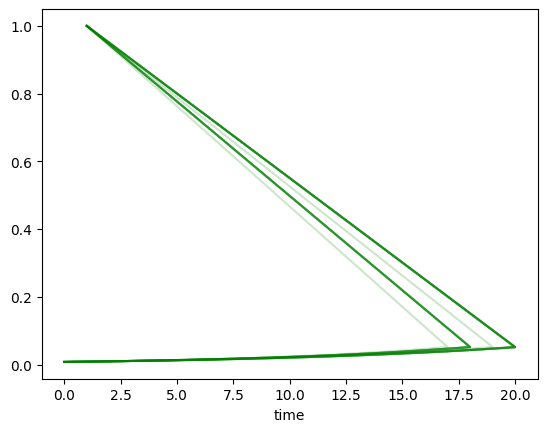

In [14]:
variable = "I"
df = results.dataframe(results.parameter_space.true_points[-20:], interpolate=False)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df.groupby("id")[variable].plot(c="green", alpha=0.2, ax=ax)

In [13]:
df

,D,E,H,I,R,S,id,p_H_to,p_I_to,r_E_to,r_H_to,r_I_to
time,,,,,,,,,,,,
0.0,0.000075,0.007197,0.000714,0.007624,0.004304,0.980086,0,None,None,None,None,None
1.0,0.000084,0.007930,0.000795,0.008484,0.004793,0.977913,0,None,None,None,None,None
2.0,0.000093,0.008757,0.000886,0.009425,0.005338,0.975501,0,None,None,None,None,None
3.0,0.000104,0.009679,0.000985,0.010460,0.005944,0.972827,0,None,None,None,None,None
4.0,0.000116,0.010702,0.001096,0.011601,0.006617,0.969868,0,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
18.0,0.000497,0.036864,0.004347,0.043111,0.027413,0.887768,19,None,None,None,None,None
19.0,0.000549,0.040219,0.004774,0.047207,0.030210,0.877041,19,None,None,None,None,None
20.0,0.000606,0.043841,0.005241,0.051612,0.033274,0.865375,19,None,None,None,None,None


In [5]:
def plot_trajectories(job_num=-1, variables=["I"], num=200):
    job=jobs[job_num]
    results = get_job_results(job)
    # results.plot_trajectories(["I"], num=num)
    df = results.dataframe(results.parameter_space.true_points[0:2])
    return df

plot_trajectories(20, "I", num=2)

,D,E,H,I,R,S,id,p_H_to,p_I_to,r_E_to,r_H_to,r_I_to
time,,,,,,,,,,,,
0.0,0.000075,0.007197,0.000714,0.007624,0.004304,0.980086,0,None,None,None,None,None
0.0,0.000075,0.007197,0.000714,0.007624,0.004304,0.980086,1,None,None,None,None,None
1.0,0.000084,0.008024,0.000795,0.008484,0.004793,0.977820,1,None,None,None,None,None


id
0      Axes(0.125,0.11;0.775x0.77)
1      Axes(0.125,0.11;0.775x0.77)
2      Axes(0.125,0.11;0.775x0.77)
3      Axes(0.125,0.11;0.775x0.77)
4      Axes(0.125,0.11;0.775x0.77)
5      Axes(0.125,0.11;0.775x0.77)
6      Axes(0.125,0.11;0.775x0.77)
7      Axes(0.125,0.11;0.775x0.77)
8      Axes(0.125,0.11;0.775x0.77)
9      Axes(0.125,0.11;0.775x0.77)
10     Axes(0.125,0.11;0.775x0.77)
11     Axes(0.125,0.11;0.775x0.77)
12     Axes(0.125,0.11;0.775x0.77)
13     Axes(0.125,0.11;0.775x0.77)
14     Axes(0.125,0.11;0.775x0.77)
15     Axes(0.125,0.11;0.775x0.77)
16     Axes(0.125,0.11;0.775x0.77)
17     Axes(0.125,0.11;0.775x0.77)
18     Axes(0.125,0.11;0.775x0.77)
19     Axes(0.125,0.11;0.775x0.77)
20     Axes(0.125,0.11;0.775x0.77)
21     Axes(0.125,0.11;0.775x0.77)
22     Axes(0.125,0.11;0.775x0.77)
23     Axes(0.125,0.11;0.775x0.77)
24     Axes(0.125,0.11;0.775x0.77)
25     Axes(0.125,0.11;0.775x0.77)
26     Axes(0.125,0.11;0.775x0.77)
27     Axes(0.125,0.11;0.775x0.77)
28     Axes(0.125

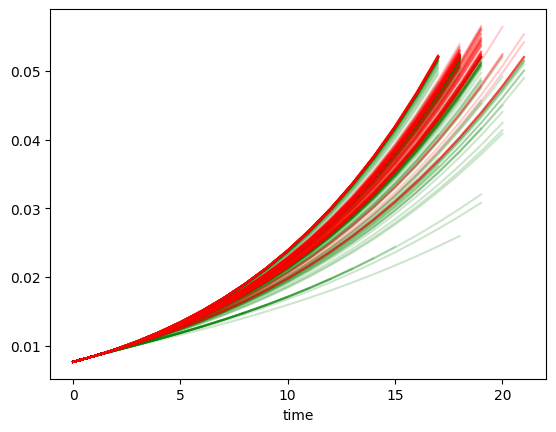

In [ ]:
tps_df.groupby("id")["I"].plot(c="green", alpha=.2)
fps_df.groupby("id")["I"].plot(c="red", alpha=.2)

In [87]:
p = results.parameter_space.true_boxes[26]
print(p.bounds["eps_m"])
print(p.bounds["c_m"])
print(p.bounds["num_steps"])

Interval([0.434809683219026, 0.4870680700225516))
Interval([0.4, 0.4507319811309092))
Interval([17.0, 17.0))


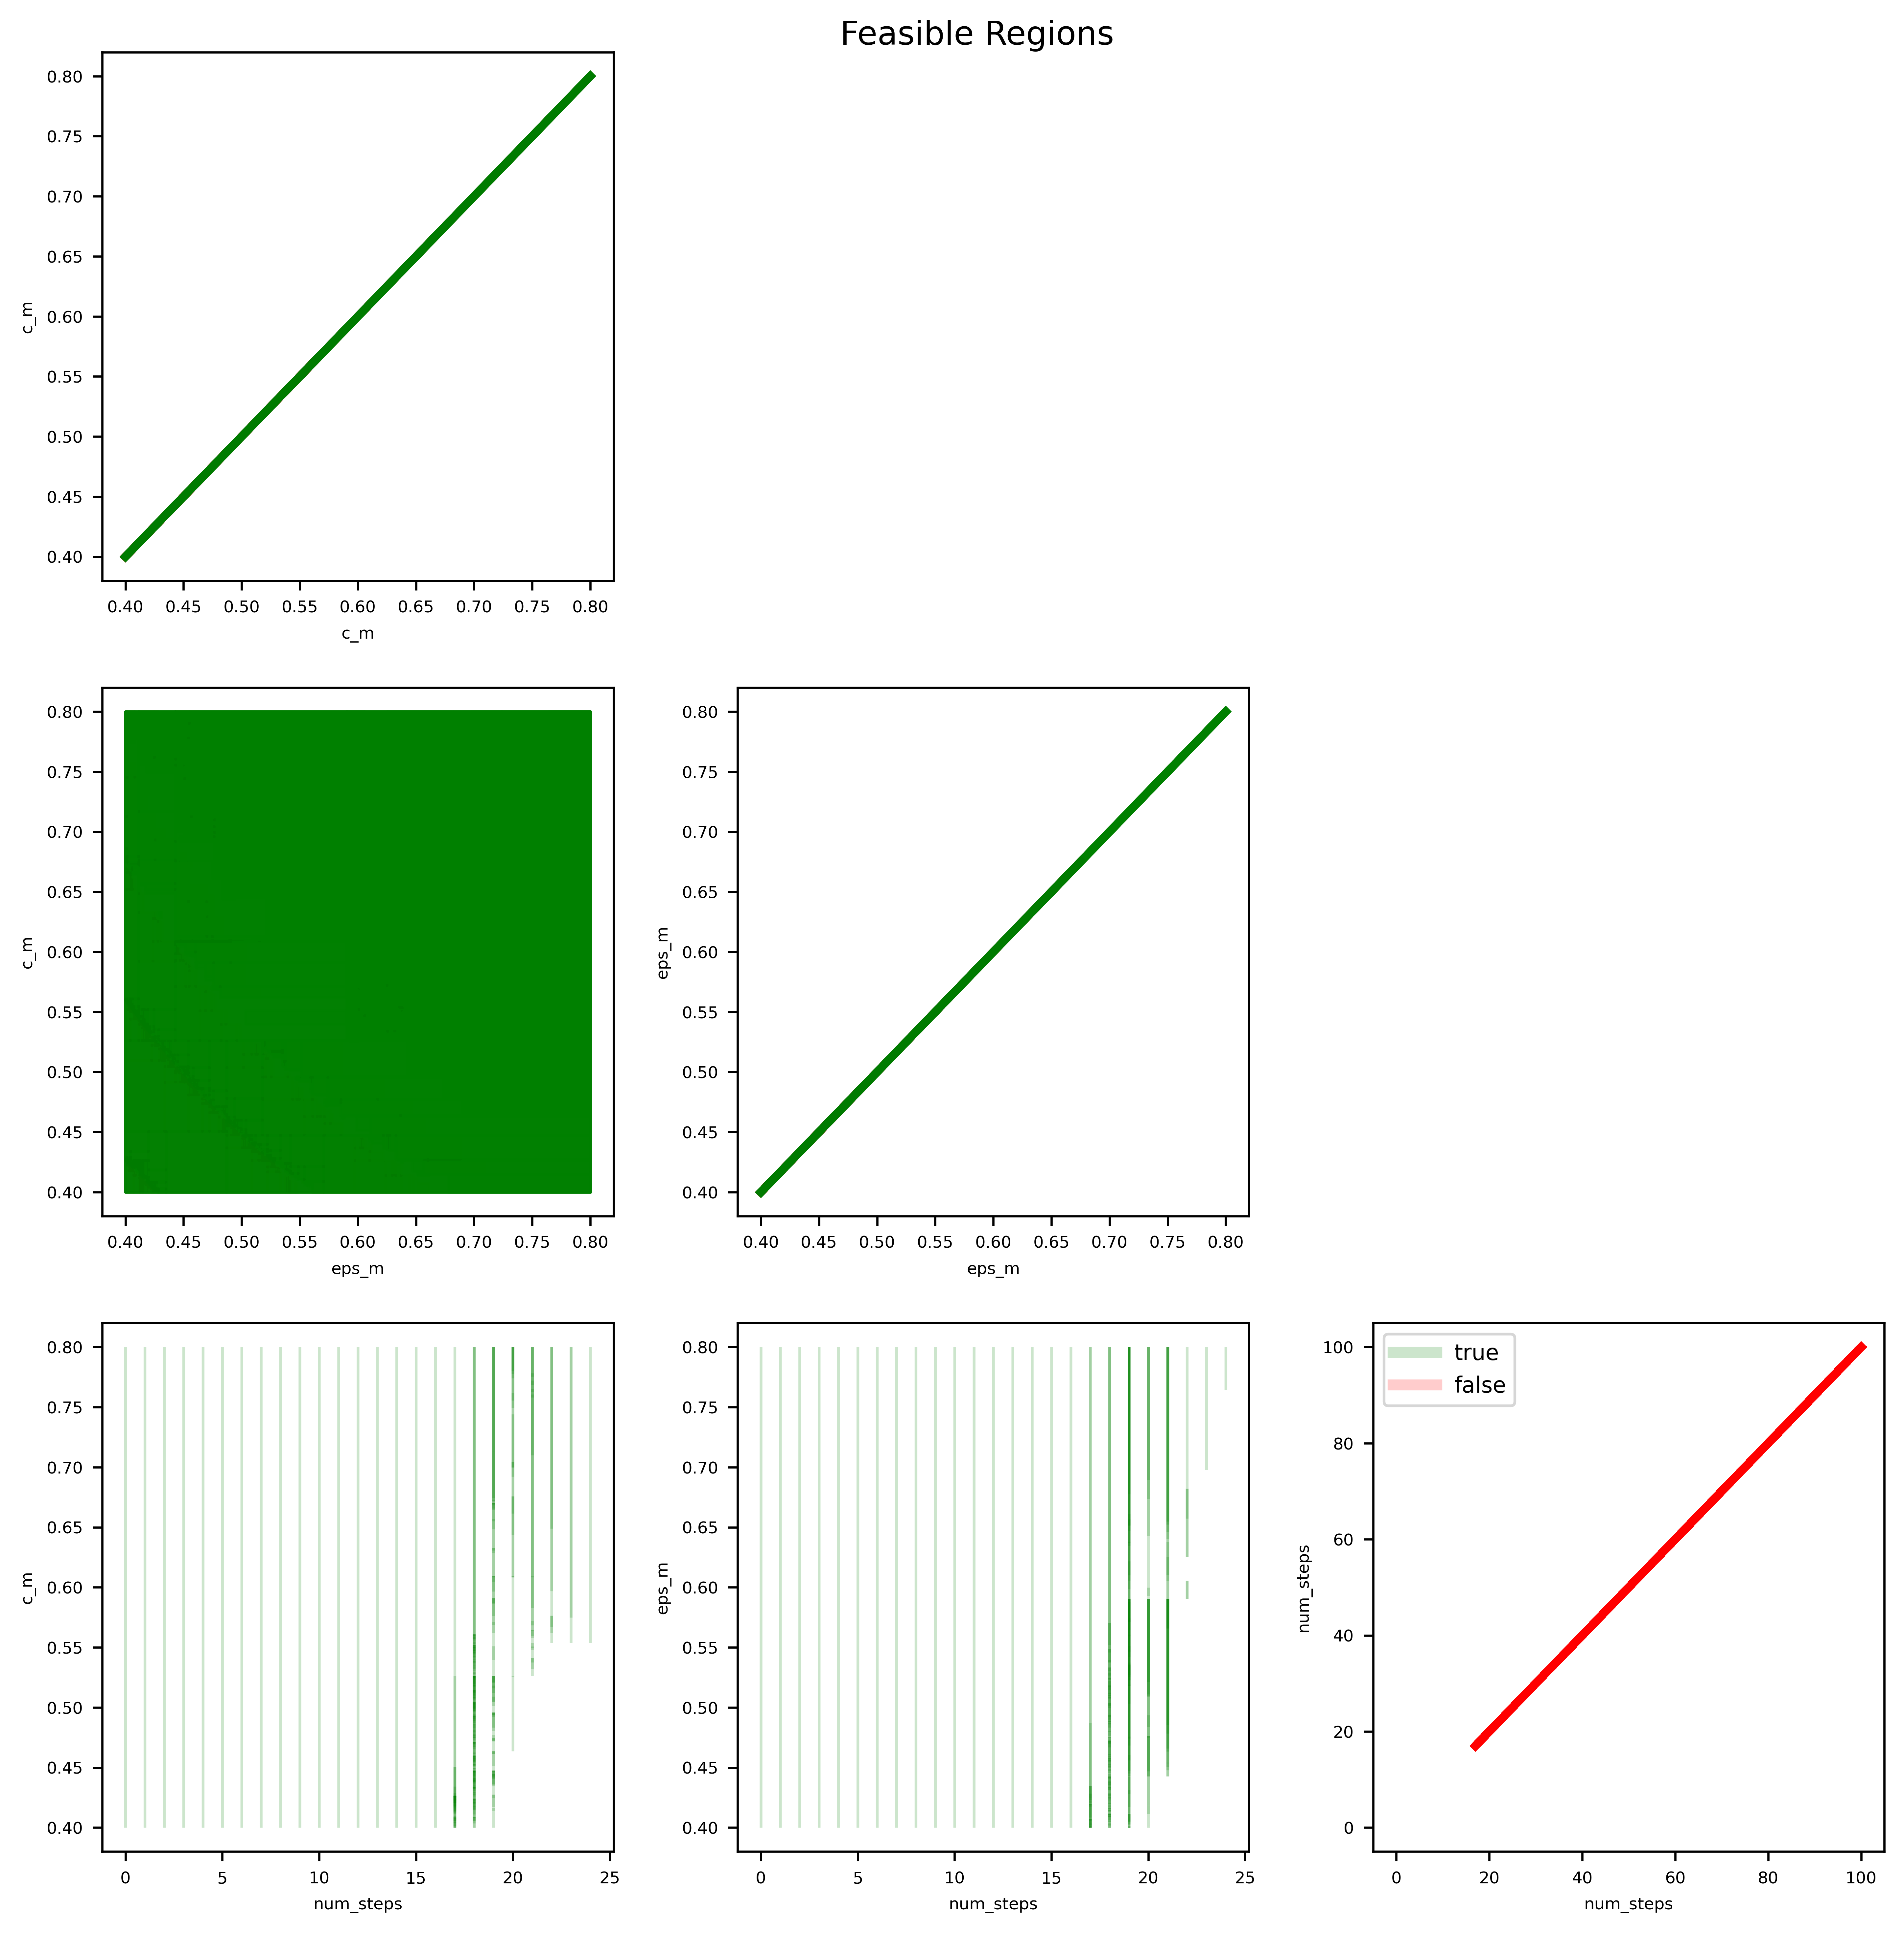

In [92]:
ParameterSpacePlotter(
        results.parameter_space, plot_points=False, parameters=["eps_m", "c_m", "num_steps"]
    ).plot(show=True)

{'I_noncompliant': {'max_percent': 0.14491169115580688, 'max_day': 148.0}, 'I_compliant': {'max_percent': 0.14491169115580688, 'max_day': 148.0}}


,D,E_compliant,E_noncompliant,H,I_compliant,I_noncompliant,R,S_compliant,S_noncompliant,id,p_H_to,p_I_to,r_H_to,r_I_to
time,,,,,,,,,,,,,,
0.0,0.000000e+00,2.585315e-08,2.585315e-08,0.000000e+00,1.034126e-07,1.034126e-07,0.000000e+00,0.500000,0.500000,0,None,None,None,None
1.0,0.000000e+00,5.170630e-08,5.170630e-08,4.136505e-09,1.007239e-07,1.007239e-07,1.158221e-08,0.500000,0.500000,0,None,None,None,None
2.0,4.963806e-11,7.158220e-08,7.158220e-08,7.751810e-09,1.034101e-07,1.034101e-07,2.322730e-08,0.500000,0.500000,0,None,None,None,None
3.0,1.426598e-10,8.828879e-08,8.828879e-08,1.111303e-08,1.098674e-07,1.098674e-07,3.549140e-08,0.500000,0.500000,0,None,None,None,None
4.0,2.760162e-10,1.035912e-07,1.035912e-07,1.439643e-08,1.191752e-07,1.191752e-07,4.877449e-08,0.500000,0.500000,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146.0,6.982868e-03,5.953908e-02,5.953908e-02,4.210152e-02,1.435394e-01,1.435394e-01,3.320256e-01,0.106367,0.106367,0,None,None,None,None
147.0,7.488087e-03,5.679194e-02,5.679194e-02,4.363294e-02,1.445382e-01,1.445382e-01,3.518069e-01,0.097206,0.097206,0,None,None,None,None
148.0,8.011682e-03,5.386353e-02,5.386353e-02,4.505118e-02,1.449117e-01,1.449117e-01,3.718349e-01,0.088776,0.088776,0,None,None,None,None


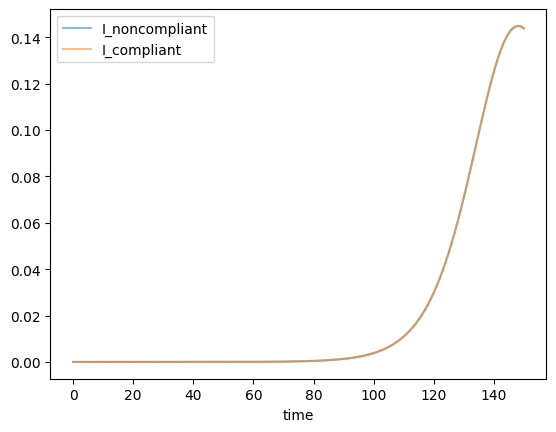

In [15]:
# t_0 = 89
# plot_point(job_num=16)

# t_0 = 100
# plot_point(job_num=17)

# t_0 = 0
# plot_point(job_num=18)

# S1.3
plot_point(job_num=23, max_vars=["I_noncompliant", "I_compliant"], plot_variables=["I_noncompliant", "I_compliant"])

In [5]:
len(jobs)

16

Max Infected %: 0.10643049589242828, Max Day: 300.0
                D            E             I             R             S
time                                                                    
0.0      0.000000     1.000000      0.000000  0.000000e+00  5.599999e+06
1.0      0.000000     0.800000      0.200000  0.000000e+00  5.599999e+06
2.0      0.000001     0.676729      0.341818  1.818065e-02  5.599999e+06
3.0      0.000004     0.603536      0.446089  4.925302e-02  5.599999e+06
4.0      0.000007     0.563936      0.526242  8.980396e-02  5.599999e+06
...           ...          ...           ...           ...           ...
396.0  346.127355  6509.435038  27377.938652  4.424640e+06  1.141126e+06
397.0  346.322043  6221.888317  26190.886748  4.427129e+06  1.140112e+06
398.0  346.508289  5947.008655  25054.240844  4.429510e+06  1.139142e+06
399.0  346.686453  5684.241502  23965.951923  4.431787e+06  1.138216e+06
400.0  346.856877  5433.056235  22924.046335  4.433966e+06  1.137330e+06

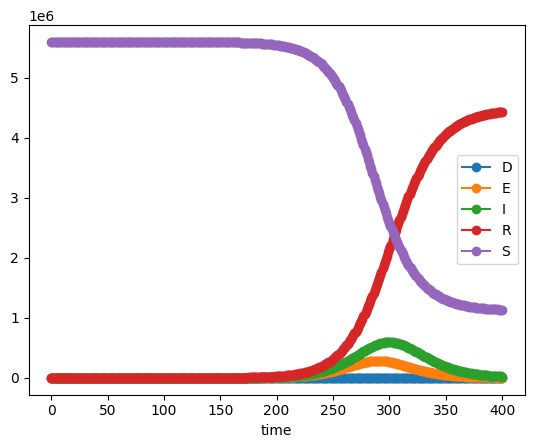

In [4]:
# t_0 = 0
# From paper:
# Max % Infected: 10.45%  (abs-diff = 0.19)
# Max Day: 291            (abs-diff = 9)
plot_point(job_num=11)

Max Infected %: 0.10649399745866316, Max Day: 208.0


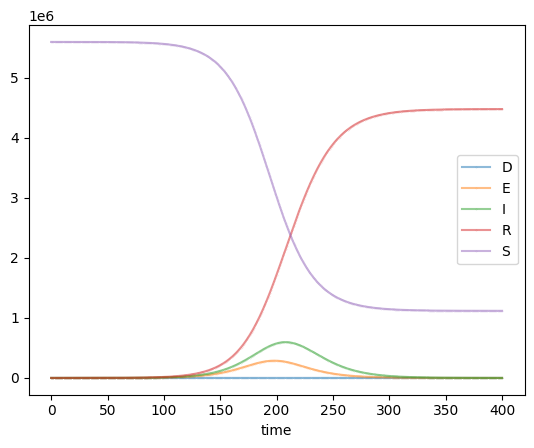

In [3]:
# t_0 = 50
# From paper:
# Max % Infected: 10.47%  (abs-diff = 0.17)
# Max Day: 195            (abs-diff = 13)
plot_point(job_num=10)

Max Infected %: 0.20321439764730662, Max Day: 112.0


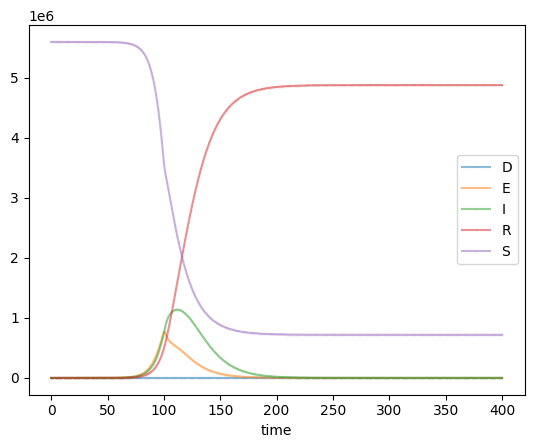

In [4]:
# t_0 = 100
# From paper:
# Max % Infected: 27.47%  (abs-diff = 7.15)
# Max Day: 103            (abs-diff = 9)
plot_point(job_num=8)

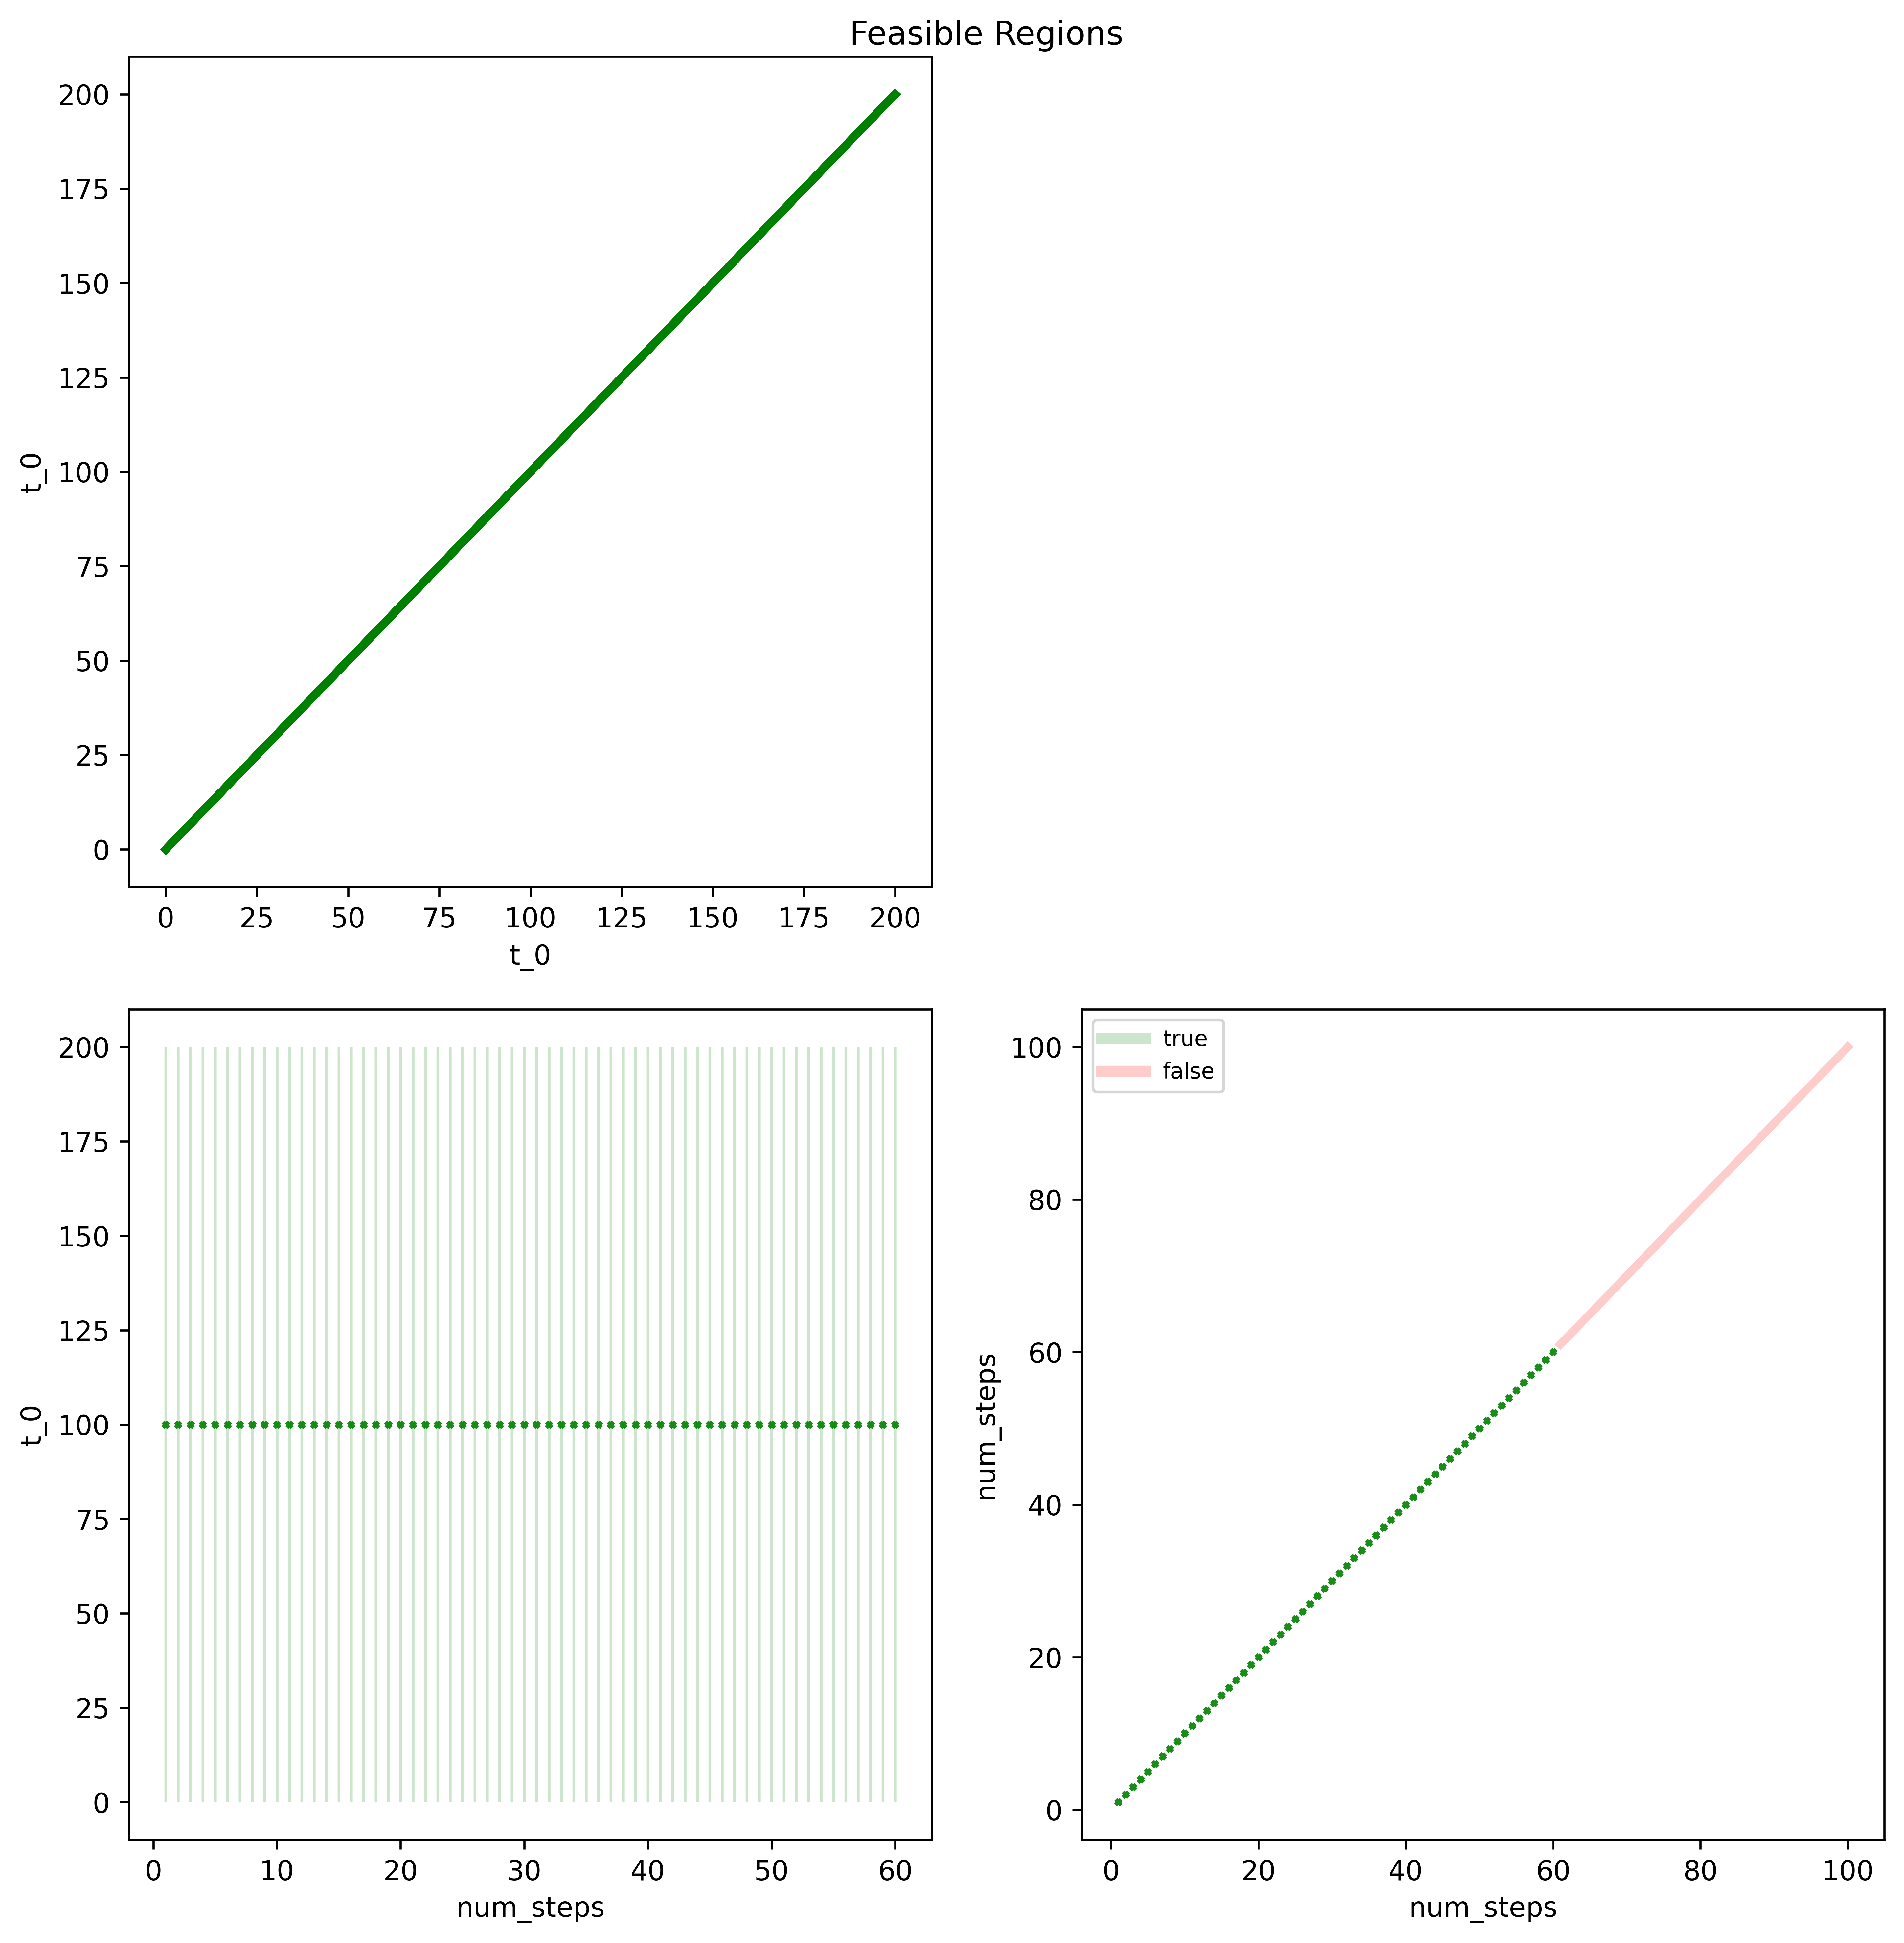

In [2]:
plot(job_num=9)

In [ ]:
# d=
results.dataframe(point)
# d.loc["I","max"]

NameError: name 'results' is not defined

In [ ]:
plot(results)